# Market Breadth: 52-Week Highs/Lows
## New Highs New Lows

https://www.investopedia.com/university/marketbreadth/marketbreadth2.asp

https://www.marketinout.com/technical_analysis.php?t=New_Highs-New_Lows&id=70

https://stockcharts.com/school/doku.php?id=chart_school:market_indicators:high_low_index

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'SPY'
start = '2012-01-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,127.760002,128.380005,127.430000,127.500000,110.244629,193697900
2012-01-04,127.199997,127.809998,126.709999,127.699997,110.417557,127186500
2012-01-05,127.010002,128.229996,126.430000,128.039993,110.711548,173895000
2012-01-06,128.199997,128.220001,127.290001,127.709999,110.426208,148050000
2012-01-09,128.000000,128.179993,127.410004,128.020004,110.694260,99530200


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-24,239.039993,240.839996,234.270004,234.339996,233.312317,147311600
2018-12-26,235.970001,246.179993,233.759995,246.179993,245.100388,218485400
2018-12-27,242.570007,248.289993,238.960007,248.070007,246.982117,186267300
2018-12-28,249.580002,251.399994,246.449997,247.750000,246.663513,153100200
2018-12-31,249.559998,250.190002,247.470001,249.919998,248.823990,144299400


In [4]:
new_high = df['Adj Close'].rolling(52).max() # 52-week lows
new_low = df['Adj Close'].rolling(52).min() # 52-week highs

In [5]:
print("Yesterday's Value:", df['Adj Close'][-2]) # Yesterday's Value
print("Current Value:", df['Adj Close'][-1]) # Current's Value

Yesterday's Value: 246.663513
Current Value: 248.82399


In [6]:
new_high = new_high.dropna()
new_low = new_low.dropna()
#Record_High_Percent = (new_high /(new_high + new_low)) * 100
#nhnl = new_high - new_low

In [7]:
# 1. Cumulative New High/Low Line
# Today's Value = Yesterday's Value + (Today's New Highs - Today's New Lows) 
df['CNHL'] = df['Adj Close'][1] + (new_high - new_low)

In [8]:
# 2. New-High Minus New-Low Oscillator 
# Oscillator = Today\'s New Highs – Today\'s New Lows
df['Oscillator'] = new_high - new_low

In [9]:
# 3. New High/Low Ratio
# Ratio = Today\'s New Highs / Today\'s New Lows 
df['Ratio'] = new_high / new_low

In [10]:
# 4. Percentage of New-High to New High + New Low 
# % New Highs = Today\'s New Highs / (Today\'s New Highs + Today\'s New Lows) 
# % New Lows = Today\'s New Lows / (Today\'s New Highs + Today\'s New Lows) 
df['NH'] = new_high/ (new_high + new_low)
df['NL'] = new_high/ (new_high + new_low)

In [11]:
# 5. Percentage of New Highs to Total Market 
# % New Highs = Today\'s New Highs / Total # of Listed Stocks in Given Market 
# % New Lows = Today\'s New Lows / Total # of Listed Stocks in Given Market 
df['NHTM'] = new_high / 5 # Number of stocks
df['NLTM'] = new_low / 5 # Number of stocks

In [12]:
df = df.dropna()
df.head(10)

,Open,High,Low,Close,Adj Close,Volume,CNHL,Oscillator,Ratio,NH,NL,NHTM,NLTM
Date,,,,,,,,,,,,,
2012-03-16,140.360001,140.479996,140.000000,140.300003,121.843971,152893500,122.016899,11.599342,1.105215,0.524989,0.524989,24.368794,22.048926
2012-03-19,140.210007,141.279999,140.110001,140.850006,122.321655,125291100,122.321655,11.904098,1.107810,0.525574,0.525574,24.464331,22.083511
2012-03-20,140.050003,140.610001,139.639999,140.440002,121.965569,121729700,122.313004,11.895447,1.107723,0.525554,0.525554,24.464331,22.085242
2012-03-21,140.520004,140.649994,139.919998,140.210007,121.765793,122388400,122.313004,11.895447,1.107723,0.525554,0.525554,24.464331,22.085242
2012-03-22,139.179993,139.550003,138.740005,139.199997,120.888680,135216700,122.044952,11.627395,1.105041,0.524950,0.524950,24.464331,22.138852
2012-03-23,139.320007,139.809998,138.550003,139.649994,121.279488,120521000,121.335937,10.918380,1.098008,0.523357,0.523357,24.464331,22.280655
2012-03-26,140.649994,141.610001,140.600006,141.610001,122.981621,120164000,121.995903,11.578346,1.103932,0.524699,0.524699,24.596324,22.280655
2012-03-27,141.740005,141.830002,141.080002,141.169998,122.599518,119868500,121.995903,11.578346,1.103932,0.524699,0.524699,24.596324,22.280655
2012-03-28,141.100006,141.320007,139.639999,140.470001,121.991638,148562100,121.995903,11.578346,1.103932,0.524699,0.524699,24.596324,22.280655


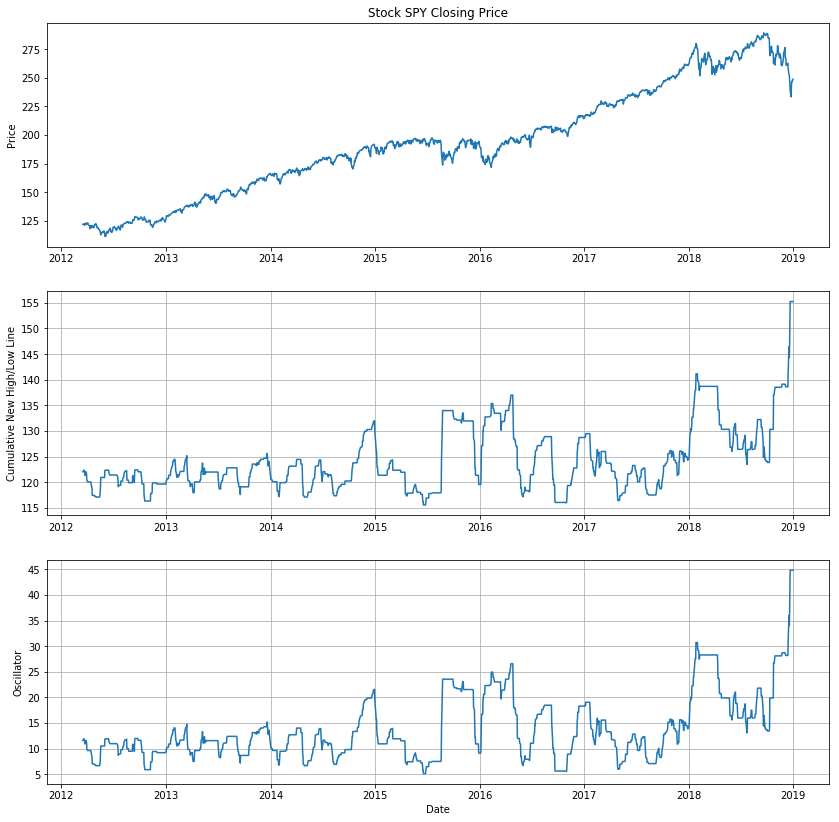

In [13]:
fig = plt.figure(figsize=(14,14))
ax1 = plt.subplot(3, 1, 1)
ax1.plot(df['Adj Close'])
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(3, 1, 2)
ax2.plot(df['CNHL'], label='Cumulative New High/Low Line')
#ax2.axhline(y=0, color='red')
ax2.set_ylabel('Cumulative New High/Low Line')
ax2.grid()

ax3 = plt.subplot(3, 1, 3)
ax3.plot(df['Oscillator'], label='Oscillator')
#ax3.axhline(y=50, color='red')
ax3.set_ylabel('Oscillator')
ax3.set_xlabel('Date')
ax3.grid()

## Candlestick with New Highs/New Lows

In [14]:
from matplotlib import dates as mdates
import datetime as dt

df['VolumePositive'] = df['Open'] < df['Adj Close']
df = df.dropna()
df = df.reset_index()
df['Date'] = mdates.date2num(df['Date'].astype(dt.date))
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,CNHL,Oscillator,Ratio,NH,NL,NHTM,NLTM,VolumePositive
0,734578.0,140.360001,140.479996,140.000000,140.300003,121.843971,152893500,122.016899,11.599342,1.105215,0.524989,0.524989,24.368794,22.048926,False
1,734581.0,140.210007,141.279999,140.110001,140.850006,122.321655,125291100,122.321655,11.904098,1.107810,0.525574,0.525574,24.464331,22.083511,False
2,734582.0,140.050003,140.610001,139.639999,140.440002,121.965569,121729700,122.313004,11.895447,1.107723,0.525554,0.525554,24.464331,22.085242,False
3,734583.0,140.520004,140.649994,139.919998,140.210007,121.765793,122388400,122.313004,11.895447,1.107723,0.525554,0.525554,24.464331,22.085242,False
4,734584.0,139.179993,139.550003,138.740005,139.199997,120.888680,135216700,122.044952,11.627395,1.105041,0.524950,0.524950,24.464331,22.138852,False


Text(0.5,0,'Date')

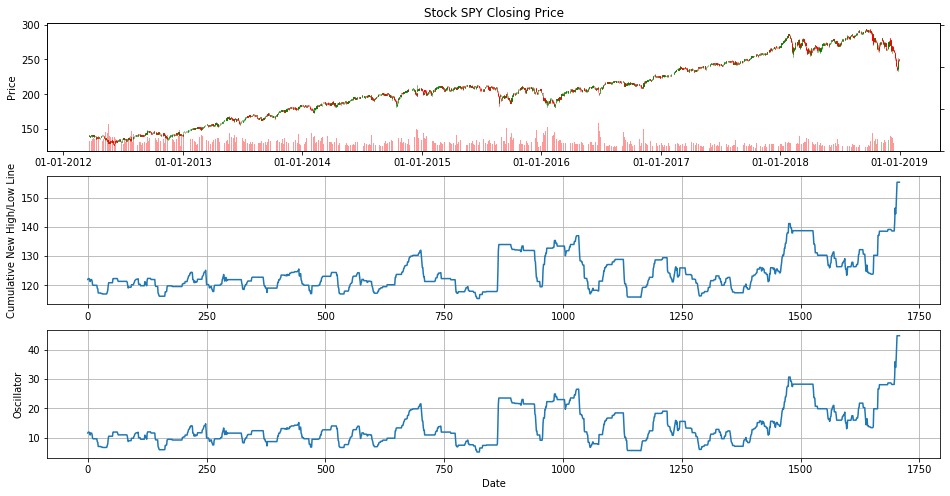

In [15]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(16,8))
ax1 = plt.subplot(3, 1, 1)
candlestick_ohlc(ax1,df.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1v = ax1.twinx()
colors = df.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(df.Date, df['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(3, 1, 2)
ax2.plot(df['CNHL'], label='Cumulative New High/Low Line')
#ax2.axhline(y=0, color='red')
ax2.grid()
ax2.set_ylabel('Cumulative New High/Low Line')

ax3 = plt.subplot(3, 1, 3)
ax3.plot(df['Oscillator'], label='Oscillator')
#ax3.axhline(y=50, color='red')
ax3.grid()
ax3.set_ylabel('Oscillator')
ax3.set_xlabel('Date')